In [79]:
pip install kaggle

In [80]:
import kaggle

In [81]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [82]:
api = KaggleApi()
api.authenticate()

In [83]:
import kaggle

# Download the dataset
!kaggle datasets download -d tamsnd/adidas-webstore-shoe-data

Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
adidas-webstore-shoe-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [84]:
import zipfile

# Unzip the file
with zipfile.ZipFile('adidas-webstore-shoe-data.zip', 'r') as zip_ref:
    zip_ref.extractall('adidas_webstore_shoe')

In [85]:
import pandas as pd

# Load datasets
country_dim_df = pd.read_csv('adidas_webstore_shoe/country_dim.csv')
shoes_dim_df = pd.read_csv('adidas_webstore_shoe/shoes_dim.csv')
shoes_fact_df = pd.read_csv('adidas_webstore_shoe/shoes_fact.csv')

# Preview data
print(country_dim_df.head())
print(shoes_dim_df.head())
print(shoes_fact_df.head())

  country_code currency shoe_metric
0           DE     euro          eu
1           US      usd         usa
2           BE     euro          eu
3           UK   pounds          uk
       id                         name best_for_wear gender  \
0  HP9426           Breaknet 2.0 Schuh          City      U   
1  HQ4199     Ultraboost 1.0 Laufschuh          City      U   
2  JQ2552  Adizero Boston 12 Laufschuh        Racing      U   
3  JI1896                  NY 90 Schuh       Neutral      U   
4  IE8976     Ultraboost 1.0 Laufschuh       Neutral      U   

                                           image_url dominant_color  \
0  https://assets.adidas.com/images/w_600,f_auto,...    Cloud White   
1  https://assets.adidas.com/images/w_600,f_auto,...     Core Black   
2  https://assets.adidas.com/images/w_600,f_auto,...    Cloud White   
3  https://assets.adidas.com/images/w_600,f_auto,...    Cloud White   
4  https://assets.adidas.com/images/w_600,f_auto,...       Grey One   

    sub_color1

In [86]:
df = pd.read_csv('adidas_webstore_shoe/country_dim.csv')

In [87]:
df = pd.read_csv('adidas_webstore_shoe/shoes_dim.csv')

In [88]:
df = pd.read_csv('adidas_webstore_shoe/shoes_fact.csv')

In [89]:
# Check the shape of the dataset (rows, columns)
print(df.shape)

# See the columns in the dataset
print(df.columns)

# Get a quick summary of the dataset
print(df.info())

# See basic statistics
print(df.describe())

(299156, 8)
Index(['Unnamed: 0', 'id', 'price', 'category', 'size', 'availability', 'date',
       'country_code'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299156 entries, 0 to 299155
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    299156 non-null  int64  
 1   id            299156 non-null  object 
 2   price         299156 non-null  float64
 3   category      299156 non-null  object 
 4   size          299156 non-null  object 
 5   availability  299156 non-null  int64  
 6   date          299156 non-null  object 
 7   country_code  299156 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.3+ MB
None
          Unnamed: 0          price   availability
count  299156.000000  299156.000000  299156.000000
mean   466431.465376      99.715583       5.868500
std    226847.605994      58.325251       6.718055
min     63575.000000      16.000000     

In [90]:
# Check for missing values
print(df.isnull().sum())

Unnamed: 0      0
id              0
price           0
category        0
size            0
availability    0
date            0
country_code    0
dtype: int64


In [91]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [92]:
# Check data types
print(df.dtypes)

Unnamed: 0        int64
id               object
price           float64
category         object
size             object
availability      int64
date             object
country_code     object
dtype: object


In [93]:
# Merge tables
merged_df = shoes_fact_df.merge(shoes_dim_df, on='id', how='left').merge(country_dim_df, on='country_code', how='left')
print(merged_df.head())

   Unnamed: 0      id  price  category    size  availability        date  \
0       63575  HP9426   60.0  sneakers      36             0  07/01/2025   
1       63575  HP9426   60.0  sneakers      36             0  07/01/2025   
2       63576  HP9426   60.0  sneakers  36 2/3             0  07/01/2025   
3       63576  HP9426   60.0  sneakers  36 2/3             0  07/01/2025   
4       63577  HP9426   60.0  sneakers  37 1/3             0  07/01/2025   

  country_code                name best_for_wear gender  \
0           DE  Breaknet 2.0 Schuh          City      U   
1           DE  Breaknet 2.0 Shoes          City      U   
2           DE  Breaknet 2.0 Schuh          City      U   
3           DE  Breaknet 2.0 Shoes          City      U   
4           DE  Breaknet 2.0 Schuh          City      U   

                                           image_url dominant_color  \
0  https://assets.adidas.com/images/w_600,f_auto,...    Cloud White   
1  https://assets.adidas.com/images/w_600,f_au

In [94]:
# Calculate revenue
merged_df['revenue'] = merged_df['price'] * merged_df['availability']  # Assuming 'availability' = quantity

# Group by country
revenue_by_country = merged_df.groupby('country_code')['revenue'].sum().sort_values(ascending=False)
print(revenue_by_country)

country_code
DE    2.654803e+08
US    6.993358e+07
BE    3.418325e+07
UK    4.610563e+06
Name: revenue, dtype: float64


In [95]:
# Count sales by category
popular_categories = merged_df['category'].value_counts()
print(popular_categories)

category
running-shoes           165741
sneakers                148912
outdoor-shoes            92095
walking-shoes            65545
us/athletic_sneakers     27159
gym_training-shoes       20257
tennis-shoes             20002
athletic_sneakers        13656
football-shoes            9193
us/running-shoes          6602
us/walking-shoes          5584
us/soccer-shoes           3965
us/workout-shoes          2480
occer-shoes               2151
us/hiking-shoes           1452
hiking-shoes              1452
us/tennis-shoes            540
Name: count, dtype: int64


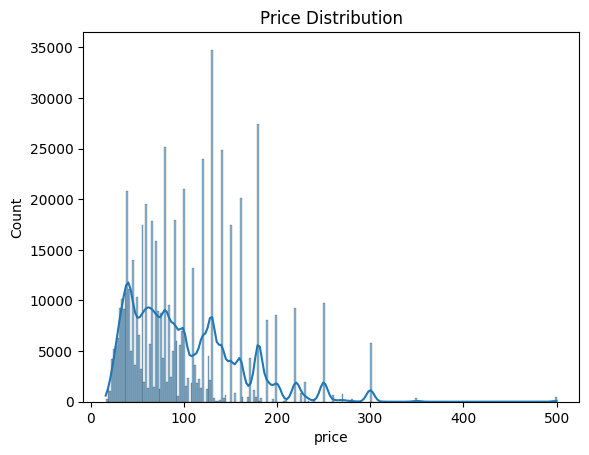

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot price distribution
sns.histplot(merged_df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

In [97]:
# Calculate the average price per category and country
avg_price = merged_df.groupby(['country_code', 'category'])['price'].mean().reset_index()

# Display the table
print(avg_price)

   country_code              category       price
0            BE        football-shoes   92.435335
1            BE    gym_training-shoes  121.986719
2            BE         outdoor-shoes  115.126079
3            BE         running-shoes  117.905330
4            BE              sneakers   71.482503
5            BE          tennis-shoes  108.486724
6            BE         walking-shoes   92.676577
7            DE        football-shoes   93.746728
8            DE    gym_training-shoes  122.035669
9            DE         outdoor-shoes  115.772589
10           DE         running-shoes  117.717142
11           DE              sneakers   66.331321
12           DE          tennis-shoes  107.762256
13           DE         walking-shoes   92.584322
14           UK              sneakers   67.936256
15           US     athletic_sneakers  119.510325
16           US          hiking-shoes  118.953168
17           US           occer-shoes  138.377034
18           US         running-shoes  131.781606


In [98]:
avg_price.style.background_gradient(cmap='coolwarm').set_caption('Average Price per Category and Country')

,country_code,category,price
0,BE,football-shoes,92.435335
1,BE,gym_training-shoes,121.986719
2,BE,outdoor-shoes,115.126079
3,BE,running-shoes,117.905330
4,BE,sneakers,71.482503
5,BE,tennis-shoes,108.486724
6,BE,walking-shoes,92.676577
7,DE,football-shoes,93.746728
8,DE,gym_training-shoes,122.035669
9,DE,outdoor-shoes,115.772589


In [99]:
category_availability = merged_df.groupby('category')['availability'].sum().reset_index()

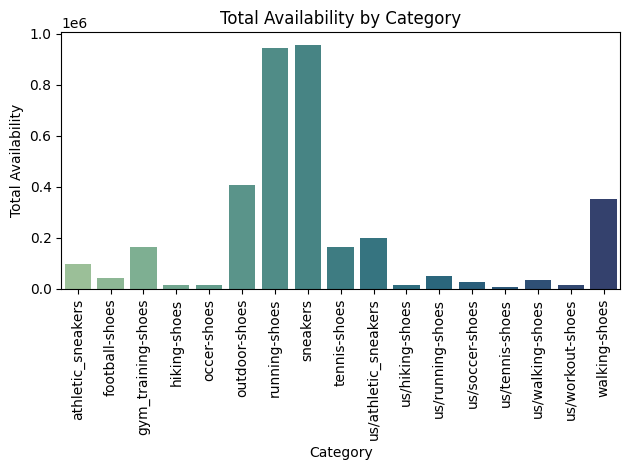

In [100]:
sns.barplot(data=category_availability, x='category', y='availability', palette='crest', hue='category', dodge=False, legend=False)
plt.title('Total Availability by Category')
plt.xlabel('Category')
plt.ylabel('Total Availability')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [101]:
low_stock = merged_df[merged_df['availability'] < 10]

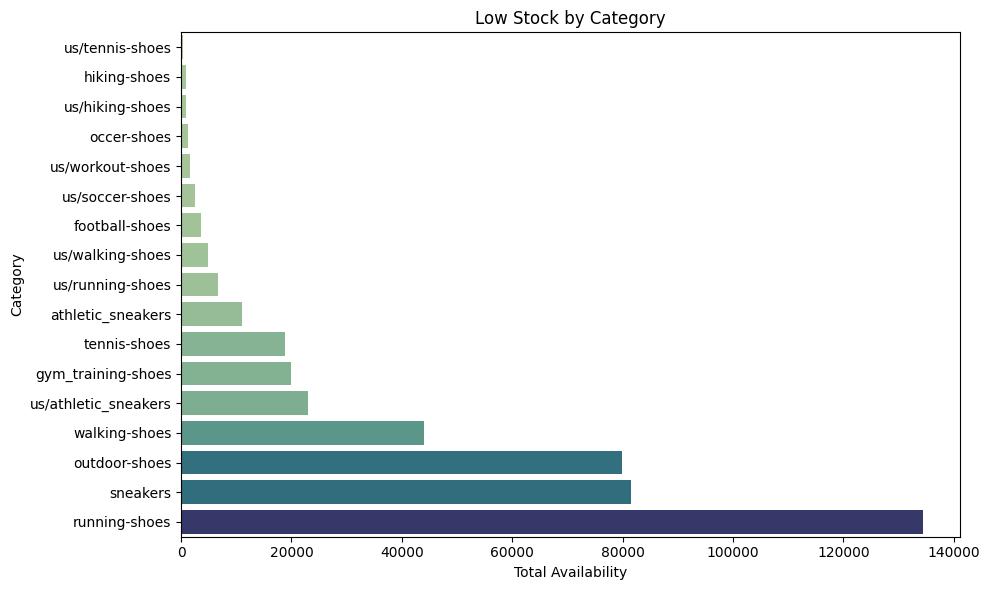

In [102]:
low_stock_grouped = low_stock.groupby('category')['availability'].sum().reset_index()
low_stock_grouped_sorted = low_stock_grouped.sort_values(by='availability')

plt.figure(figsize=(10, 6))
sns.barplot(data=low_stock_grouped_sorted, y='category', x='availability', palette='crest', hue='availability', dodge=False, legend=False)
plt.title('Low Stock by Category')
plt.xlabel('Total Availability')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [103]:
pip install plotly

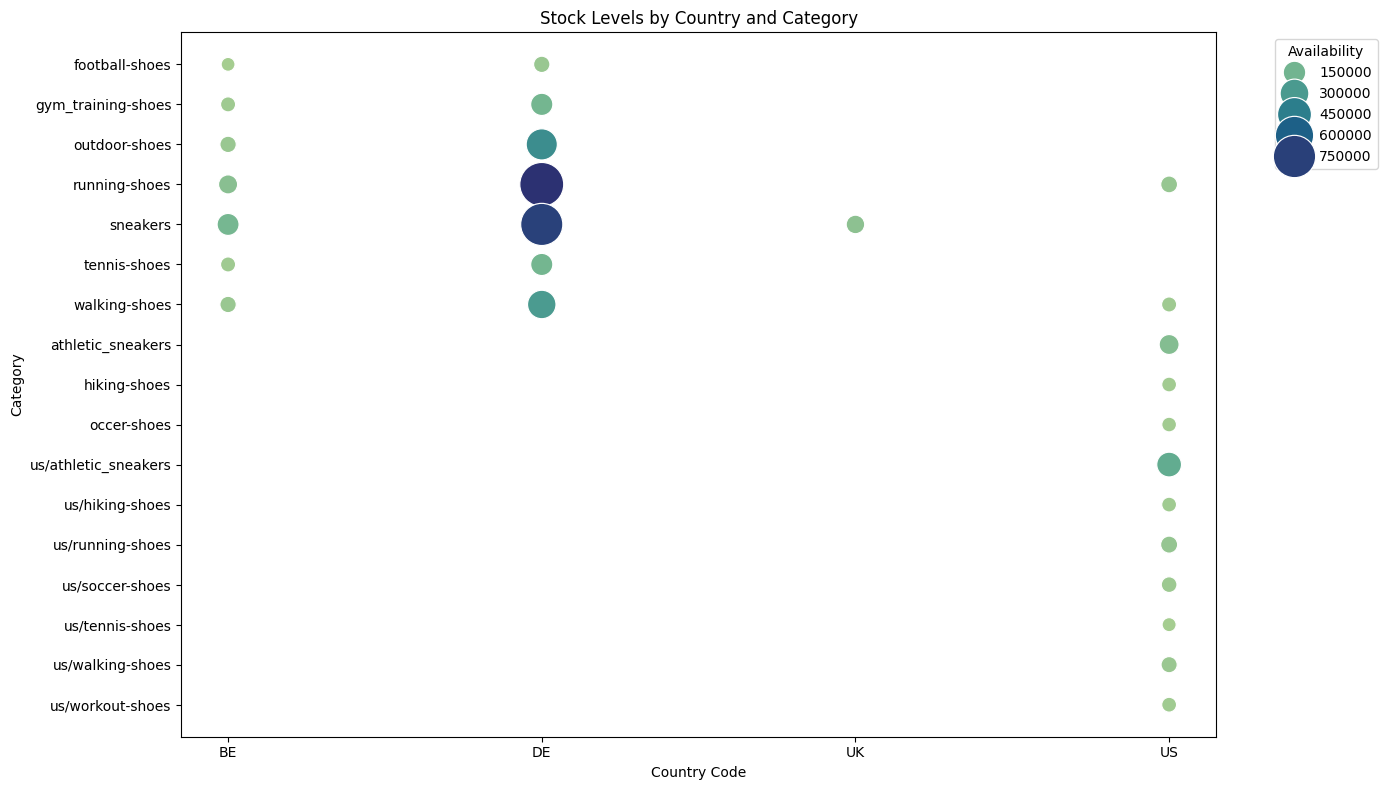

In [104]:
# Prepare data for bubble chart
bubble_data = merged_df.groupby(['country_code', 'category'])['availability'].sum().reset_index()

# Plot the bubble chart
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=bubble_data, 
    x='country_code', 
    y='category', 
    size='availability', 
    sizes=(100, 1000), 
    hue='availability', 
    palette='crest', 
    legend='brief'
)
plt.title('Stock Levels by Country and Category')
plt.xlabel('Country Code')
plt.ylabel('Category')
plt.legend(title='Availability', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [105]:
size_availability = merged_df.groupby('size')['availability'].sum().reset_index()

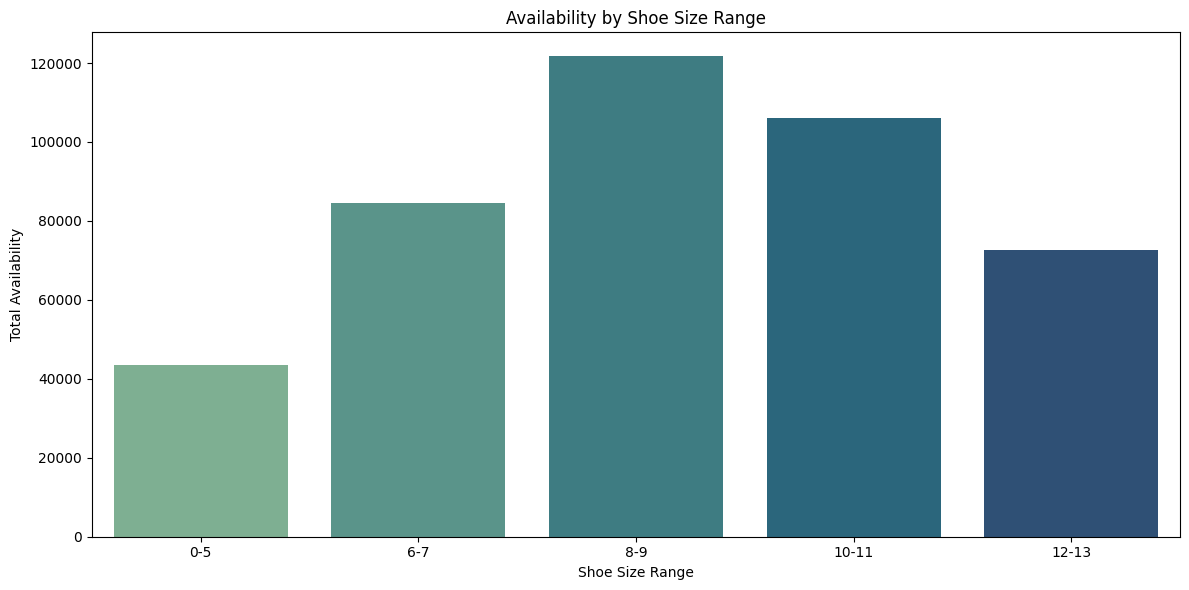

In [106]:
# Ensure 'size' is numeric
size_availability['size'] = pd.to_numeric(size_availability['size'], errors='coerce')

# Bins and labels
bins = [0, 5, 7, 9, 11, 13]
labels = ['0-5', '6-7', '8-9', '10-11', '12-13']

# Bin the sizes
size_bins = pd.cut(size_availability['size'], bins=bins, labels=labels, right=False)
size_availability['size_range'] = size_bins

# Group by size range and calculate total availability (pass observed=False explicitly)
size_range_availability = size_availability.groupby('size_range', observed=False)['availability'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=size_range_availability,
    x='size_range',
    y='availability',
    palette='crest',
    hue='size_range',
    dodge=False,
    legend=False
)
plt.title('Availability by Shoe Size Range')
plt.xlabel('Shoe Size Range')
plt.ylabel('Total Availability')
plt.tight_layout()
plt.show()

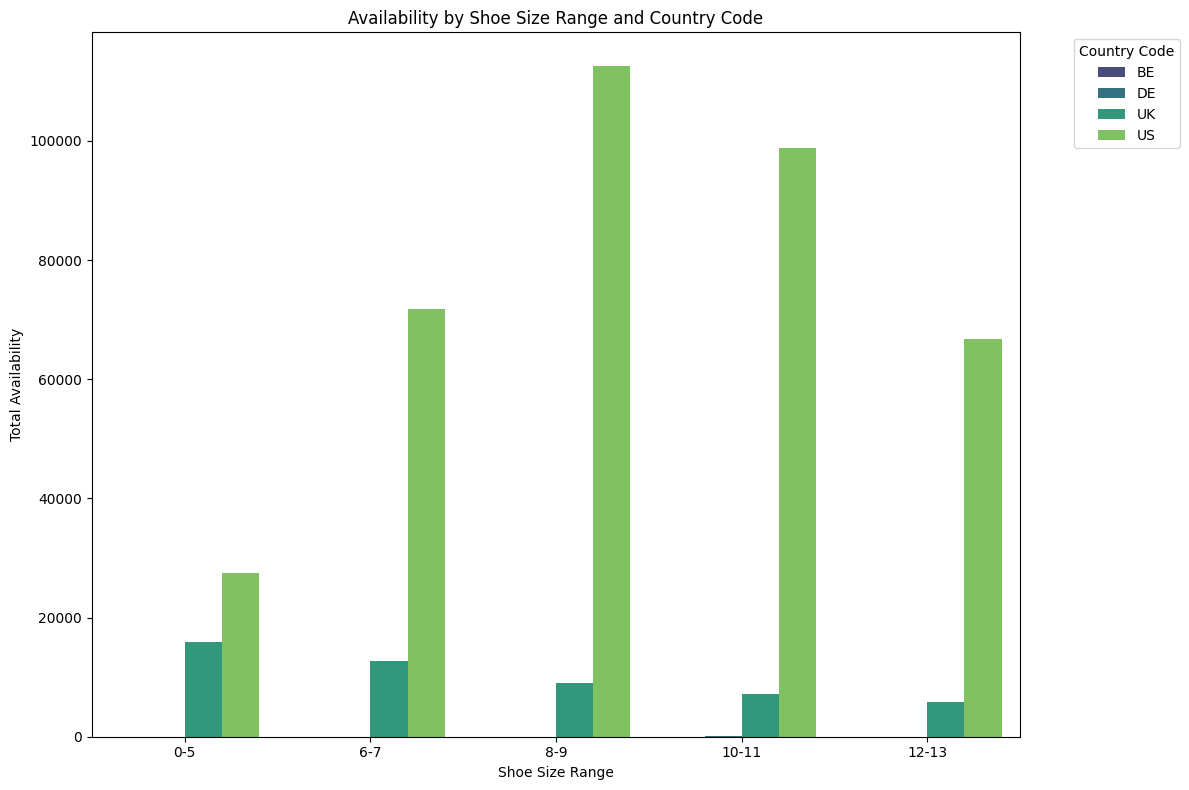

In [107]:
# Ensure 'size' is numeric in the merged DataFrame
merged_df['size'] = pd.to_numeric(merged_df['size'], errors='coerce')

# Bins and labels
bins = [0, 5, 7, 9, 11, 13]
labels = ['0-5', '6-7', '8-9', '10-11', '12-13']

# Bin the sizes
merged_df['size_range'] = pd.cut(merged_df['size'], bins=bins, labels=labels, right=False)

# Group by size range and country code, then calculate total availability
size_country_availability = merged_df.groupby(
    ['size_range', 'country_code'], observed=False
)['availability'].sum().reset_index()

# Create the stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    data=size_country_availability,
    x='size_range',
    y='availability',
    hue='country_code',
    palette='viridis'
)
plt.title('Availability by Shoe Size Range and Country Code')
plt.xlabel('Shoe Size Range')
plt.ylabel('Total Availability')
plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

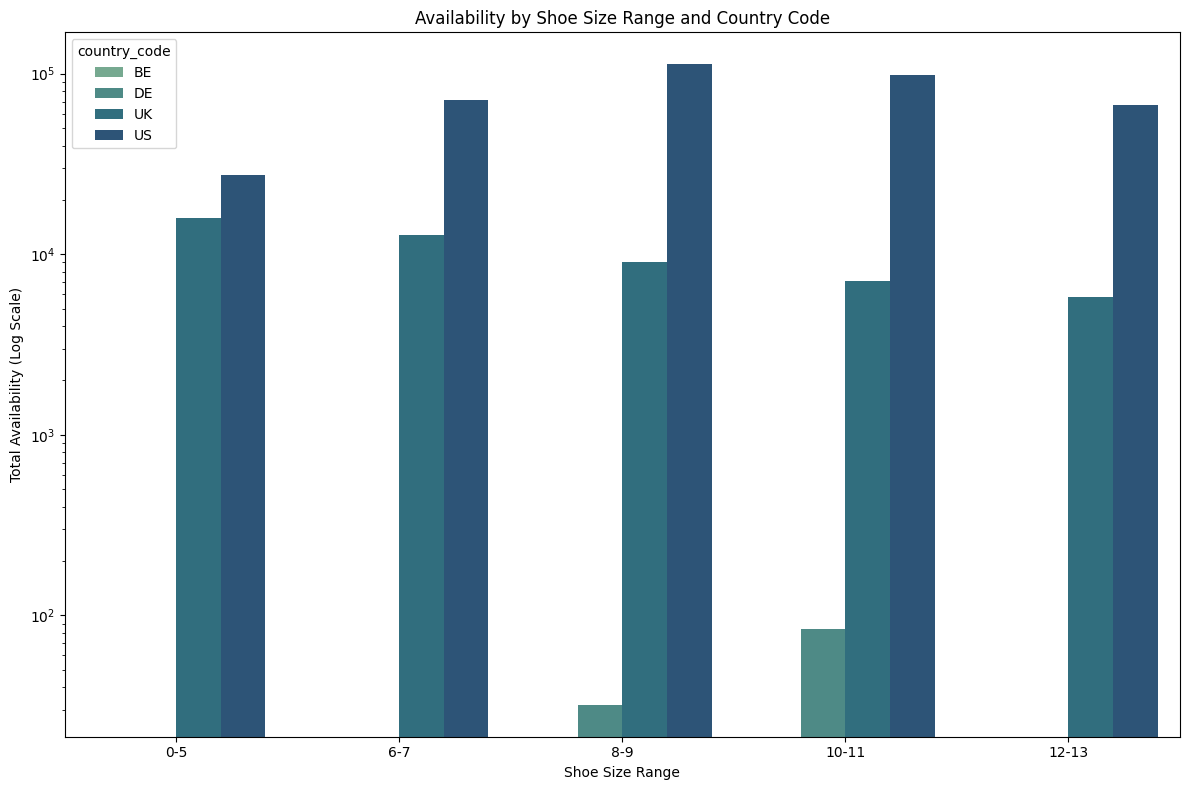

In [108]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=size_country_availability, 
    x='size_range', 
    y='availability', 
    hue='country_code', 
    palette='crest'
)
plt.title('Availability by Shoe Size Range and Country Code')
plt.xlabel('Shoe Size Range')
plt.ylabel('Total Availability (Log Scale)')
plt.yscale('log')  # Apply log scale to Y-axis
plt.tight_layout()
plt.show()

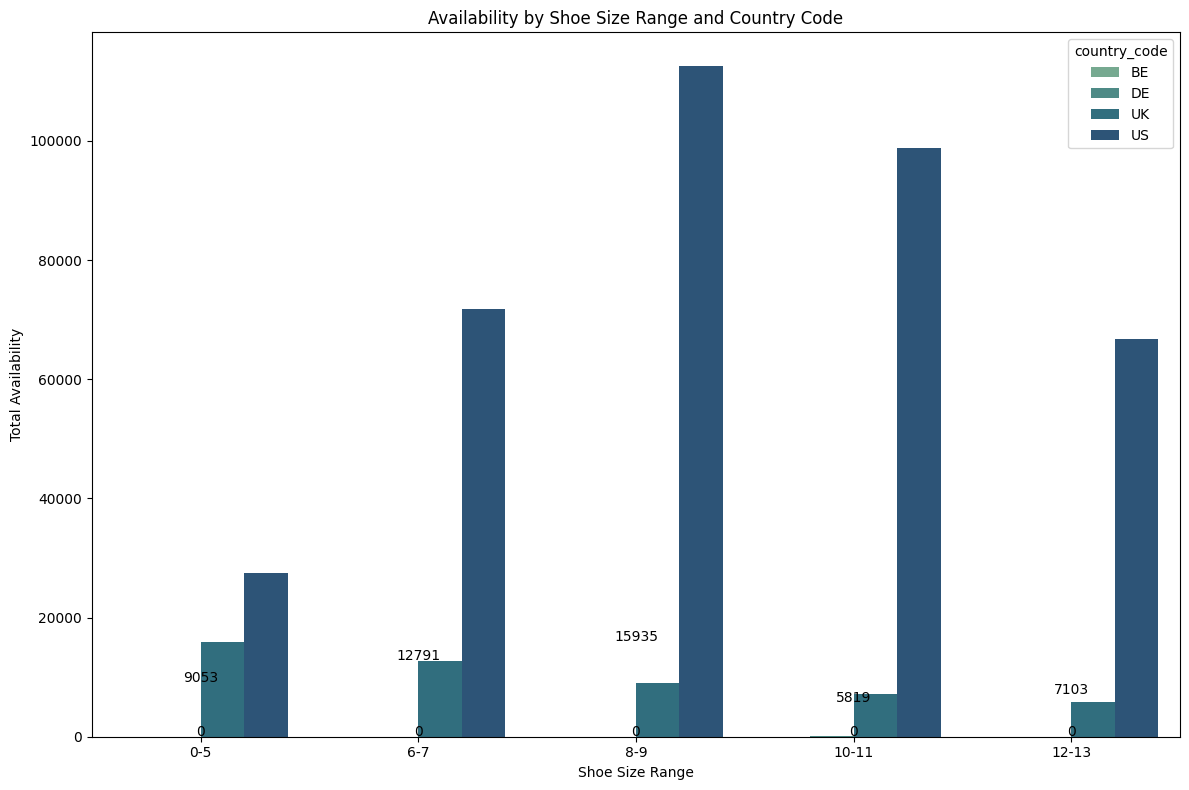

In [109]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=size_country_availability, 
    x='size_range', 
    y='availability', 
    hue='country_code', 
    palette='crest'
)

# Add annotations for BE and UK
for i, row in size_country_availability.iterrows():
    if row['country_code'] in ['BE', 'UK']:
        plt.text(
            x=i % len(size_country_availability['size_range'].unique()), 
            y=row['availability'] + 50,  # Offset the label above the bar
            s=f"{row['availability']}",
            color='black',
            ha='center'
        )

plt.title('Availability by Shoe Size Range and Country Code')
plt.xlabel('Shoe Size Range')
plt.ylabel('Total Availability')
plt.tight_layout()
plt.show()

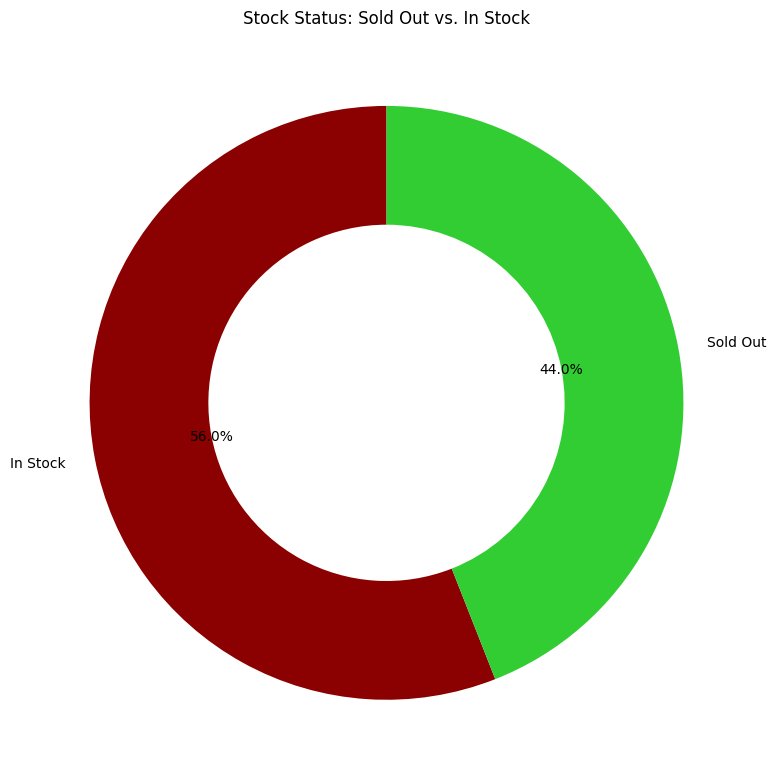

In [110]:
# Define custom colors for the segments
colors = ['#8B0000', '#32CD32']  # Scarlet Red for 'Sold Out' and Chateau Green for 'In Stock'

# Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    stock_status, 
    labels=stock_status.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=colors, 
    wedgeprops={'width': 0.4}
)
plt.title('Stock Status: Sold Out vs. In Stock')
plt.tight_layout()
plt.show()

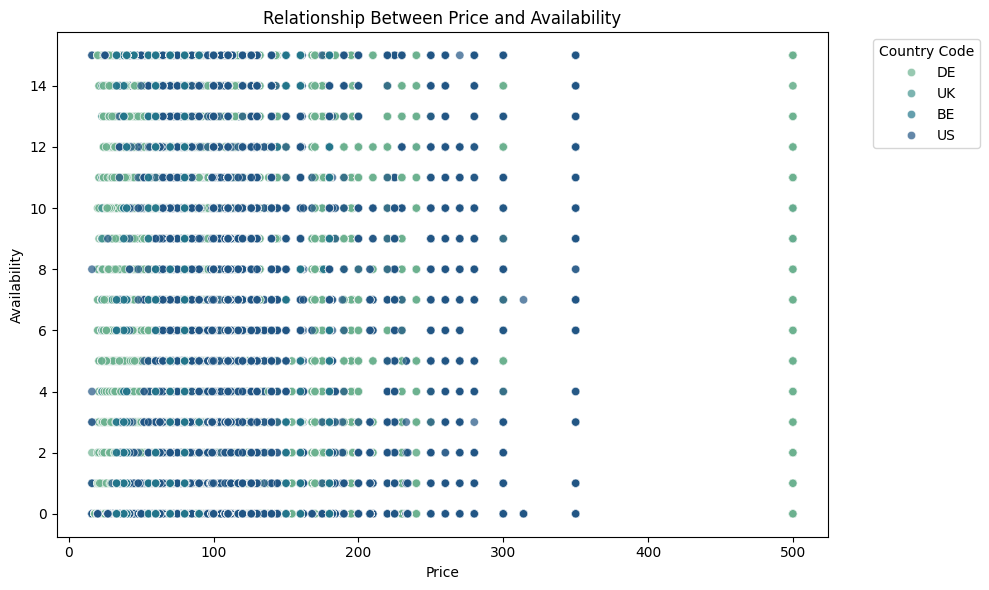

In [111]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_df,
    x='price',
    y='availability',
    hue='country_code',
    palette='crest',
    alpha=0.7
)
plt.title('Relationship Between Price and Availability')
plt.xlabel('Price')
plt.ylabel('Availability')
plt.legend(title='Country Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()